In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_cbg_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..CBG
0,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.042471
1,3,0.147638,0.127715,0.509446,0.032539,0.056278,-0.280844,0.527530,0.212648,0.050864,...,0.155563,0.164850,-0.106371,0.177229,-0.695585,0.023077,-0.674670,-0.076964,-0.590824,0.042471
2,7,0.035710,0.201637,0.594890,0.030520,0.127054,-0.244745,0.298687,0.301295,0.103147,...,0.006037,0.187179,0.035906,0.119722,-0.590700,-0.152532,-0.557452,-0.110804,-0.395861,0.042471
3,11,0.170528,0.103973,0.662458,0.064816,0.057608,-0.352557,0.769633,0.161602,-0.060384,...,0.177055,0.108112,-0.087304,0.253053,-0.742809,0.064430,-0.801632,-0.197547,-0.772660,0.042471
4,13,0.228885,0.109906,0.588899,0.070310,0.026625,-0.370848,0.754401,0.215168,-0.129841,...,0.165573,0.127164,-0.140357,0.235097,-0.730830,0.103537,-0.790641,-0.174511,-0.783329,0.042471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.335907
74996,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.335907
74997,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.335907
74998,42975,0.136489,0.148309,0.570469,0.100240,-0.043398,-0.397642,0.790510,0.156836,-0.026515,...,0.122552,0.140842,-0.137621,0.211509,-0.724223,0.056200,-0.790721,-0.113418,-0.736053,0.335907


In [5]:
X = df_mlp.drop(['index', 'X..CBG'], axis = 1)
y = df_mlp[['X..CBG']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

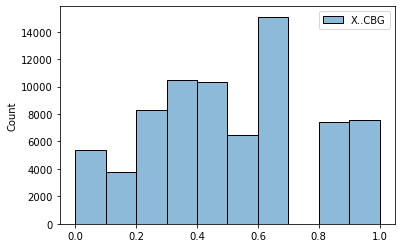

In [6]:
sns.histplot(y, bins = 10)

PCA

In [7]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [8]:
pca_comps

array([[ 2.33094951e+00, -4.59373079e-01,  6.35511196e-02, ...,
        -7.22469912e-03,  8.36720633e-03,  3.47298460e-08],
       [ 2.33094951e+00, -4.59373079e-01,  6.35511196e-02, ...,
        -7.22469912e-03,  8.36720633e-03,  3.47298626e-08],
       [ 5.96702846e+00,  1.06895161e+00,  1.63361475e-01, ...,
         6.16531978e-03,  5.60827665e-03, -2.81152482e-08],
       ...,
       [-1.50509105e-01, -3.74612928e-01, -1.50663423e-01, ...,
         2.08648514e-03,  1.19482483e-03, -3.89574726e-08],
       [-1.50509105e-01, -3.74612928e-01, -1.50663423e-01, ...,
         2.08648514e-03,  1.19482483e-03, -3.89574726e-08],
       [ 6.06594359e+00,  1.06607637e+00,  7.47232525e-01, ...,
        -1.58548210e-02,  6.03929279e-03,  4.21478543e-08]])

In [9]:
type(pca_comps)

numpy.ndarray

In [10]:
explained_variance = pca.explained_variance_ratio_

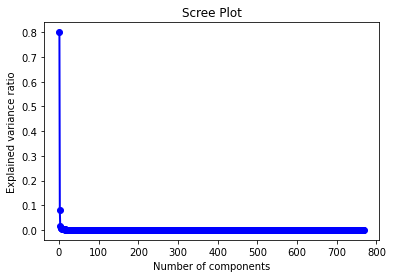

In [11]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [12]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [13]:
n_components_optimal

1

In [14]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [15]:
X_reduced

array([[ 2.33094951],
       [ 2.33094951],
       [ 5.96702846],
       ...,
       [-0.1505091 ],
       [-0.1505091 ],
       [ 6.06594359]])

train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [17]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [18]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
mean_absolute_error(y_val, y_pred_mlp)

0.2213035466837345

In [20]:
mean_squared_error(y_val, y_pred_mlp)

0.07136407594435804

In [21]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.26714055466057196

In [22]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.016062974236757288

In [23]:
#val
r2_score(y_val, y_pred_mlp)

0.009175373245559393

Hyperparameter tuning (MLP)

In [24]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [25]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [26]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [27]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [28]:
joblib.dump(rscv, "rscv_mlp_bert_cbg.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_cbg.pkl")

['rscv_mlp_bert_best_params_cbg.pkl']

kNN (after hyperparameter tuning)

In [29]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.21942940536386846

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.06955431310837974

In [32]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.2637315170933875

In [33]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.043568237136531685

In [34]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.034302267453092616

Predicting on the test set (MLP)

In [35]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [36]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_cbg.pkl")
joblib.dump(y_test, "y_test_mlp_bert_cbg.pkl")

['y_test_mlp_bert_cbg.pkl']

In [37]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.21930376228199663

In [38]:
mean_squared_error(y_test, y_pred_mlp_test)

0.06929513108864821

In [39]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.26323968372691875

In [40]:
r2_score(y_test, y_pred_mlp_test)

0.046757484747710354

Error analysis (kNN)

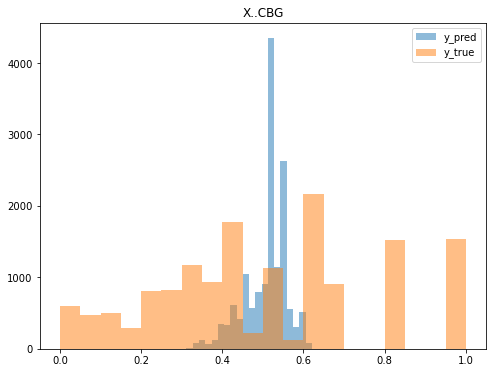

<Figure size 432x288 with 0 Axes>

In [41]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBG"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_cbg.png')

Pearson R

In [42]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.218
P-value: 0.000


<AxesSubplot:>

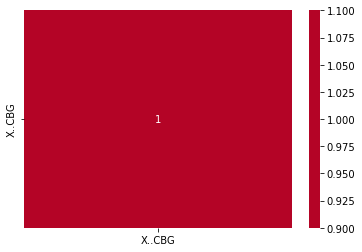

In [43]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)